<a href="https://colab.research.google.com/github/Praneshss/PUF_Tutorial/blob/main/Modeling_attack_on_APUF_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modeling Attack on 4-bit APUF: Step-by-Step Tutorial**

Demonstrated during talk organized by IIEST Shibpur, India

Let's say CRP (challenge-response) table of a 4-bit APUF instance is given by:


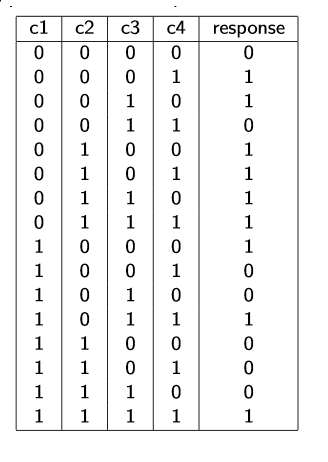

In [1]:
import numpy as np

In [2]:
challenges=np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1],
            [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], 
            [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], 
            [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])
print("Challenges:",challenges)
responses=np.array([0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1])
print("Responses:",responses)

Challenges: [[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]
Responses: [0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1]


**Challenges are converted to parity vectors (Φ)**

In [3]:
def get_parity_vectors(C):
  n=C.shape[1]
  m=C.shape[0]
  C[C==0]=-1
  parityVec=np.zeros((m,n+1))
  parityVec[:,0:1]=np.ones((m,1))
  for i in range(2,n+2):
      parityVec[:,i-1:i]=np.prod(C[:,0:i-1],axis=1).reshape((m,1))
  return parityVec

In [4]:
"""
C=challenges
n=C.shape[1]
m=C.shape[0]
C[C==0]=-1
print(C)
parityVec=np.zeros((m,n+1))
parityVec.shape
parityVec[:,0:1]=np.ones((m,1))
parityVec
#x= range(2,)
#C[:,0:2-1]
for i in range(2,n+2):
  parityVec[:,i-1:i]=np.prod(C[:,0:i-1],axis=1).reshape((m,1))
  #print(np.prod(C[:,0:i-1], axis=1))

#print(np.prod(C[:,0:1], axis=1))
#a=np.prod(C[:,0:1], axis=1)
#a=a.reshape((m,1))
#parityVec[:,1:2]=a
parityVec
"""

'\nC=challenges\nn=C.shape[1]\nm=C.shape[0]\nC[C==0]=-1\nprint(C)\nparityVec=np.zeros((m,n+1))\nparityVec.shape\nparityVec[:,0:1]=np.ones((m,1))\nparityVec\n#x= range(2,)\n#C[:,0:2-1]\nfor i in range(2,n+2):\n  parityVec[:,i-1:i]=np.prod(C[:,0:i-1],axis=1).reshape((m,1))\n  #print(np.prod(C[:,0:i-1], axis=1))\n\n#print(np.prod(C[:,0:1], axis=1))\n#a=np.prod(C[:,0:1], axis=1)\n#a=a.reshape((m,1))\n#parityVec[:,1:2]=a\nparityVec\n'

In [5]:
features=get_parity_vectors(challenges)
print(features)

[[ 1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1.]
 [ 1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.]
 [ 1. -1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1. -1.]
 [ 1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1.  1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1. -1.]
 [ 1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1.]
 [ 1.  1.  1.  1.  1.]]


In [6]:
responses[responses==0]=-1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [8]:
train_features, test_features, train_labels, test_labels = train_test_split(features, responses, test_size = 0.2, random_state = 42)
lin_svc = svm.LinearSVC(C=1.0).fit(train_features, train_labels)

In [18]:
for (intercept, coef) in zip(lin_svc.intercept_, lin_svc.coef_):
    s = "y = {0:.3f}".format(intercept)
    for (i, c) in enumerate(coef):
        s += " + {0:.3f} * \u03A6[{1}]".format(c, i)

    print(s)


y = 0.097 + 0.097 * Φ[0] + -0.283 * Φ[1] + -0.282 * Φ[2] + 0.189 * Φ[3] + -0.419 * Φ[4]


ValueError: ignored

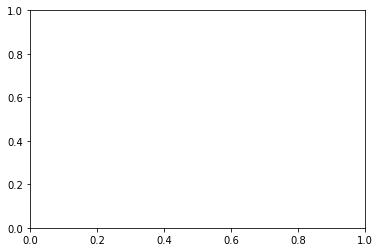

In [23]:
import matplotlib.pyplot as plt 
X=train_features
y=train_labels
clf=lin_svc

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()